In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import os
import PIL.Image
import cv2
import random
from PIL import Image # Python Image Library is a library that adds support for opening, manipulating, and saving many different
                      # image file formats

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_1 = Image.open("/content/drive/MyDrive/Creative+AI+Dataset/Creative AI Dataset/eiffel.jpg")
img_2= Image.open("/content/drive/MyDrive/Creative+AI+Dataset/Creative AI Dataset/mars.jpg")

In [ ]:
image = Image.blend(img_1, img_2, 0.5)
image.save("img_0.jpg")

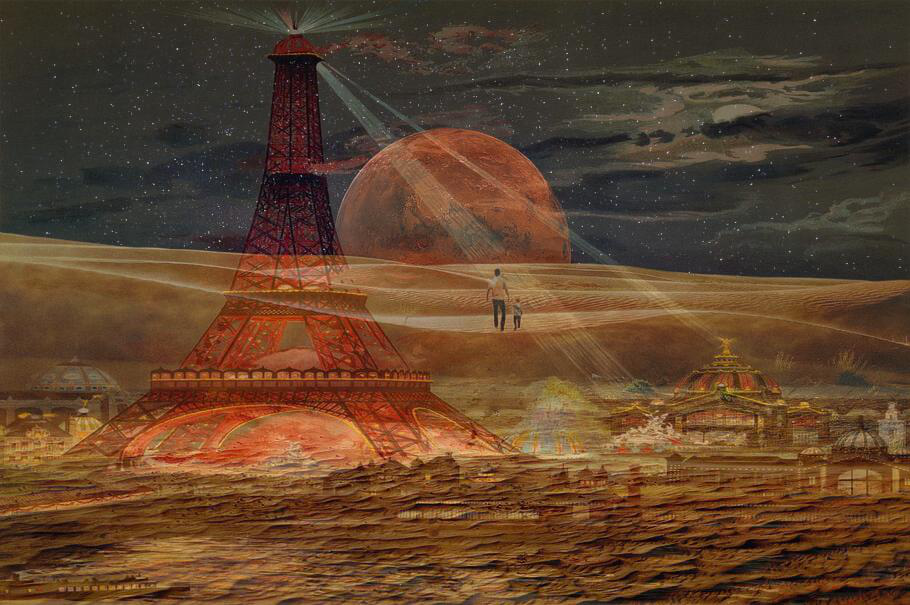

In [ ]:
Sample_Image = tf.keras.preprocessing.image.load_img('img_0.jpg')
Sample_Image

In [ ]:
np.shape(Sample_Image)

(605, 910, 3)

In [ ]:
type(Sample_Image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
# Convert to numpy array
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
type(Sample_Image)

numpy.ndarray

In [ ]:
# Obtain the max and min values
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))


min pixel values = 0.0, max pixel values = 255.0


In [ ]:
# Normalize the input image
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image.shape

(605, 910, 3)

In [ ]:
# Let's verify normalized images values!
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 1.0


In [ ]:
Sample_Image = tf.expand_dims(Sample_Image, axis = 0)

In [ ]:
np.shape(Sample_Image)

TensorShape([1, 605, 910, 3])

# ***RUN the pretrained model:***

In [ ]:
base_model=tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_94 (Conv2D)             (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_94 (BatchN  (None, None, None,   96         ['conv2d_94[0][0]']              
 ormalization)                  32)                                                    

In [ ]:
# Maximize the activations of these layers

names = ['mixed3', 'mixed5', 'mixed7']

# names = ['mixed3']

layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [ ]:
deepdream_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_94 (Conv2D)             (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_94 (BatchN  (None, None, None,   96         ['conv2d_94[0][0]']              
 ormalization)                  32)                                                         

In [ ]:
# Let's run the model by feeding in our input image and taking a look at the activations "Neuron outputs"
activations = deepdream_model(Sample_Image)
activations

[<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.02111739,
           0.42713785, 0.30679742],
          [0.        , 0.13667153, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.25661832, 0.        , ..., 0.        ,
           0.07347696, 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.42646617,
           0.        , 0.        ],
          [0.05945809, 0.        , 0.        , ..., 0.42646617,
           0.6412622 , 0.        ]],
 
         [[0.6751412 , 0.        , 0.        , ..., 0.02111739,
           0.28741294, 0.65448624],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.22241248],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [ ]:
len(activations)

3

In [ ]:
Sample_Image.shape

TensorShape([1, 605, 910, 3])

In [ ]:
Sample_Image = tf.squeeze(Sample_Image, axis = 0)

In [ ]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [ ]:
def calc_loss(image, model):
    # Function used for loss calculations
    # It works by feedforwarding the input image through the network and generate activations
    # Then obtain the average and sum of those outputs

    img_batch = tf.expand_dims(image, axis=0) # Convert into batch format
    layer_activations = model(img_batch) # Run the model
    print('ACTIVATION VALUES (LAYER OUTPUT) =\n', layer_activations)
    # print('ACTIVATION SHAPE =\n', layer_activations.shape)

    losses = [] # accumulator to hold all the losses
    for act in layer_activations:
        loss = tf.math.reduce_mean(act) # calculate mean of each activation 
        losses.append(loss)
  
    print('LOSSES (FROM MULTIPLE ACTIVATION LAYERS) = ', losses)
    print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', tf.shape(losses))
    print('SUM OF ALL LOSSES (FROM ALL SELECTED LAYERS)= ', tf.reduce_sum(losses))

    return tf.reduce_sum(losses) # Calculate sum 


In [ ]:
loss = calc_loss(tf.Variable(Sample_Image), deepdream_model)

ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.02111739,
          0.42713785, 0.30679742],
         [0.        , 0.13667153, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.25661832, 0.        , ..., 0.        ,
          0.07347696, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.42646617,
          0.        , 0.        ],
         [0.05945809, 0.        , 0.        , ..., 0.42646617,
          0.6412622 , 0.        ]],

        [[0.6751412 , 0.        , 0.        , ..., 0.02111739,
          0.28741294, 0.65448624],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.22241248],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
       

In [ ]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.5577076>

In [ ]:
# When you annotate a function with tf.function, the function can be called like any other python defined function. 
# The benefit is that it will be compiled into a graph so it will be much faster and could be executed over TPU/GPU

@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
      # This needs gradients relative to `img`
      # `GradientTape` only watches `tf.Variable`s by default
      tape.watch(image)
      loss = calc_loss(image, model) # call the function that calculate the loss 

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    # The syntax is as follows: dy_dx = g.gradient(y, x) 
    gradients = tape.gradient(loss, image)

    print('GRADIENTS =\n', gradients)
    print('GRADIENTS SHAPE =\n', np.shape(gradients))

    # tf.math.reduce_std computes the standard deviation of elements across dimensions of a tensor
    gradients /= tf.math.reduce_std(gradients)  

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

In [ ]:
def run_deep_dream_simple(model, image, steps = 100, step_size = 0.01):
  # Convert from uint8 to the range expected by the model.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)
    
    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  # clear_output(wait=True)
  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

In [ ]:
type(loss)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


In [ ]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [ ]:
Sample_Image = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))

In [ ]:
Sample_Image.shape

(605, 910, 3)

In [ ]:
dream_img = run_deep_dream_simple(model = deepdream_model, image = Sample_Image, steps = 4000, step_size = 0.001)



In [ ]:
image = tf.keras.preprocessing.image.load_img("img_0.jpg")

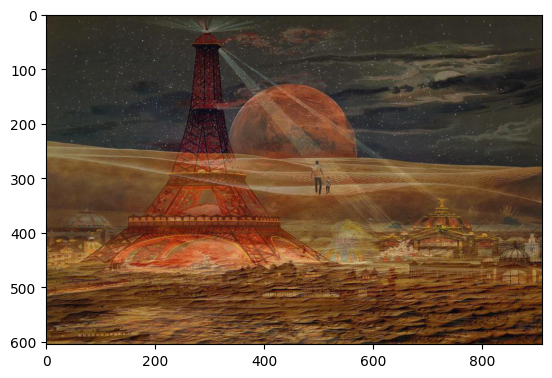

In [ ]:
plt.imshow(image)

In [ ]:
!mkdir maryem

In [ ]:
x_size = 910 # larger the image longer is going to take to fetch the frames 
y_size = 605

In [ ]:
# Define Counters 
created_count = 0
max_count = 50

In [ ]:
# This helper function loads an image and returns it as a numpy array of floating points

def load_image(filename):
    image = PIL.Image.open(filename)
    return np.float32(image)

In [ ]:
dream_name = 'maryem'

In [ ]:
for i in range(0, 50):
    # Make sure to create a new folder entitled 'mars_eiffel' and place img_0 in it
    # Get into the dream directory and look for the number of images and then figure out what is the latest image. Hence this 
    # image we are going to start with and let it dream on and on
     
    if os.path.isfile('/content/drive/MyDrive/Creative+AI+Dataset/Creative AI Dataset/{}/img_{}.jpg'.format(dream_name, i+1)):
        print("{} present already, continue fetching the frames...".format(i+1))
        
    else:
        # Call the load image funtion
        img_result = load_image(r'/content/drive/MyDrive/Creative+AI+Dataset/Creative AI Dataset/{}/img_{}.jpg'.format(dream_name, i))

    
        # Zoom the image 
        x_zoom = 2 # this indicates how quick the zoom is 
        y_zoom = 1
        
        # Chop off the edges of the image and resize the image back to the original shape. This gives the visual changes of a zoom
        img_result = img_result[0+x_zoom : y_size-y_zoom, 0+y_zoom : x_size-x_zoom]
        img_result = cv2.resize(img_result, (x_size, y_size))
        
        # Adjust the RGB value of the image
        img_result[:, :, 0] += 2  # red
        img_result[:, :, 1] += 2  # green
        img_result[:, :, 2] += 2  # blue
        
        # Deep dream model  
        img_result = run_deep_dream_simple(model = deepdream_model, image = img_result, steps = 500, step_size = 0.001)
        
        # Clip the image, convert the datatype of the array, and then convert to an actual image. 
        img_result = np.clip(img_result, 0.0, 255.0)
        img_result = img_result.astype(np.uint8)
        result = PIL.Image.fromarray(img_result, mode='RGB')
        
        # Save all the frames in the dream location
        result.save(r'/content/drive/MyDrive/Creative+AI+Dataset/Creative AI Dataset/{}/img_{}.jpg'.format(dream_name, i+1))
        
        created_count += 1
        if created_count > max_count:
            break

1 present already, continue fetching the frames...
2 present already, continue fetching the frames...
3 present already, continue fetching the frames...
4 present already, continue fetching the frames...
5 present already, continue fetching the frames...
6 present already, continue fetching the frames...
7 present already, continue fetching the frames...
8 present already, continue fetching the frames...
9 present already, continue fetching the frames...
10 present already, continue fetching the frames...
11 present already, continue fetching the frames...
12 present already, continue fetching the frames...
13 present already, continue fetching the frames...
14 present already, continue fetching the frames...
15 present already, continue fetching the frames...
16 present already, continue fetching the frames...
17 present already, continue fetching the frames...
18 present already, continue fetching the frames...
19 present already, continue fetching the frames...
20 present already, c

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving maryem-20230428T102400Z-001.zip to maryem-20230428T102400Z-001.zip


In [ ]:
# Unzip the folder

from zipfile import ZipFile
file_name = "maryem-20230428T102400Z-001.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:

dream_path = 'maryem-20230428T102400Z-001'

In [ ]:
# Define the codec and create VideoWriter object 
# Download FFmeg 

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC is a 4-byte code used to specify the video codec

out = cv2.VideoWriter('deepdreamvideo.avi', fourcc , 5.0, (910, 605)) # Specify the fourCC, frames per second (fps),
                                                                            # and frame size
# The frames per second value is depends on few important things
# 1. The number of frames we have created. Less number of frames brings small fps
# 2. The larger the image the bigger the fps value. For example, 1080 pixel image can bring 60 fps 

In [ ]:
for i in range(9999999999999):
    
    # Get into the dream directory and looks for the number of images and then figure out what is the latest image. Hence with 
    # this image we are going to start with and let it dream on and on
    if os.path.isfile('maryem/img_{}.jpg'.format(i+1)):
        pass
    # Figure out how long the dream is 
    else:
        dream_length = i
        break

In [ ]:
dream_length

50

In [ ]:
for i in range(dream_length):
    
    # Build the frames of cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # join the dream path
    
    print(img_path) # print the image path 
    
    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

maryem-20230428T102400Z-001/img_0.jpg
maryem-20230428T102400Z-001/img_1.jpg
maryem-20230428T102400Z-001/img_2.jpg
maryem-20230428T102400Z-001/img_3.jpg
maryem-20230428T102400Z-001/img_4.jpg
maryem-20230428T102400Z-001/img_5.jpg
maryem-20230428T102400Z-001/img_6.jpg
maryem-20230428T102400Z-001/img_7.jpg
maryem-20230428T102400Z-001/img_8.jpg
maryem-20230428T102400Z-001/img_9.jpg
maryem-20230428T102400Z-001/img_10.jpg
maryem-20230428T102400Z-001/img_11.jpg
maryem-20230428T102400Z-001/img_12.jpg
maryem-20230428T102400Z-001/img_13.jpg
maryem-20230428T102400Z-001/img_14.jpg
maryem-20230428T102400Z-001/img_15.jpg
maryem-20230428T102400Z-001/img_16.jpg
maryem-20230428T102400Z-001/img_17.jpg
maryem-20230428T102400Z-001/img_18.jpg
maryem-20230428T102400Z-001/img_19.jpg
maryem-20230428T102400Z-001/img_20.jpg
maryem-20230428T102400Z-001/img_21.jpg
maryem-20230428T102400Z-001/img_22.jpg
maryem-20230428T102400Z-001/img_23.jpg
maryem-20230428T102400Z-001/img_24.jpg
maryem-20230428T102400Z-001/img_25.